In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!pip install matplotlib

  Using cached matplotlib-3.3.4-cp39-cp39-win_amd64.whl (8.5 MB)


You should consider upgrading via the 'c:\users\vladp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Using cached Pillow-8.1.2-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [2]:
data_test = np.genfromtxt('lab_1_test.csv', delimiter=',')
data_train = np.genfromtxt('lab_1_train.csv', delimiter=',')

In [ ]:
plt.scatter(data_train[:,0], data_train[:,1])

In [3]:
def mean_squared_error(beta0, beta1, x, y):
    ff = np.array([beta0 + beta1 * x_i for x_i in x])
    return np.sum(np.dot((y-ff).T, (y-ff)))

# Часткова похідна по beta0
def dbeta0(beta0, beta1, x, y):
    ff = np.array([beta0 + beta1 * x_i for x_i in x])
    return -2*(y - ff).sum()

# Часткова похідна по beta1
def dbeta1(beta0, beta1, x, y):
    ff = np.array([beta0 + beta1 * x_i for x_i in x])
    return -2 * np.dot((y - ff).T, x)


lmb1 = 0.02
lmb2 = 0.04

beta0_i = 0
beta1_i = 1
beta0 = beta0_i - lmb1 * dbeta0(beta0_i, beta1_i, data_train[:, 0], data_train[:, 1])
beta1 = beta1_i - lmb2 * dbeta1(beta0_i, beta1_i, data_train[:, 0], data_train[:, 1])

print('{0:>20}'.format("beta0"),'{0:>20}'.format("beta1"),'{0:>20}'.format("MSE"))
while abs(beta0_i - beta0) > 0.0001 and abs(beta1_i - beta1) > 0.0001:
    # Потрібно взяти за модулем |beta0_i - beta0|
    if abs(beta0_i - beta0) > 0.001:
        beta0_i = beta0
        beta0 = beta0_i - lmb1 * dbeta0(beta0_i, beta1, data_train[:, 0], data_train[:, 1])
    if abs(beta1_i - beta1) > 0.0001:
        beta1_i = beta1
        beta1 = beta1_i - lmb2 * dbeta1(beta0, beta1_i, data_train[:, 0], data_train[:, 1])
    print('{0:>20}'.format(beta0),'{0:>20}'.format(beta1),'{0:>20}'.format(mean_squared_error(beta0,beta1,data_train[:,0],data_train[:,1])))

               beta0                beta1                  MSE
  -40.25934319107228   100.12010046695225    75256.12813890874
   34.08099057458406    23.67944306486757    26299.52533210056
 -15.328824733349848    61.71674092325551   24906.412199829465
  26.642485500217774    17.92376533453765    8315.145552909964
 -0.7987359793887236    38.47712221519951    8310.515435484751
  22.920209776408708   13.326391334720633   2653.7906303930113
   7.700269015854198    24.35827884000433    2799.515870839476
  21.118715015710926    9.875519965903267    858.8629750267861
   12.69025756900113   15.747852198107772     954.174847531607
  20.290490700775997    7.384206078353335   284.14065695961364
  15.631438511430165   10.477491368322156    330.5418395045645
  19.941943914447258    5.632734237664587    97.69522116712245
  17.371971752989094   7.2402707102527195   117.65032090833171
  19.820300634919857    4.424700922141422    36.19623516077346
  18.406199200335923   5.2452837653636895   44.18278278

Функція втрат на тестових даних

In [4]:
print(mean_squared_error(beta0,beta1,data_test[:,0],data_test[:,1]))

3.0078853446203038


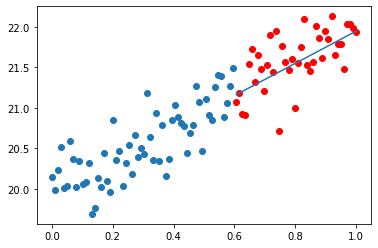

In [5]:
plt.scatter(data_train[:,0], data_train[:,1])
plt.scatter(data_test[:,0], data_test[:,1], c='red')
plt.plot(data_test[:,0],[beta0 + beta1 * x_i for x_i in data_test[:,0]])